In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
hr_df = pd.read_csv('hr_comma_sep.csv')

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
X_features = list(hr_df.columns)
X_features.remove('left')
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary']

In [9]:
encoded_hr_df = pd.get_dummies(hr_df[X_features],
drop_first = True)

In [10]:
encoded_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
y = hr_df['left']
X = sm.add_constant(encoded_hr_df)

C:\Users\Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
from sklearn.model_selection import train_test_split_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model = sm.Logit(y_train, X_train).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.425451
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.225    
Dependent Variable:   left               AIC:                8971.6245
Date:                 2021-09-01 10:58   BIC:                9109.5462
No. Observations:     10499              Log-Likelihood:     -4466.8  
Df Model:             18                 LL-Null:            -5761.7  
Df Residuals:         10480              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.7951   0.2307  -7.7818 0.0000 -2.2473 -1.3430
satisfaction_level    -4.1857   0.1173 -35.6847 0.0000 -4.4156 -3.9558
last_evaluation        0.6297   0.1787   3.5234 0.0004  0.2794  0.9800
number_project        -0.3019   0.0254 -11.8800 0.0000 -0.3517 -0.2521
average_montly_hours   0.0048   0.0006   7.7658 0.0000  0.0036  0.0060
time_spend_company     0.2678   0.0187  14.3073 0.0000  0.2311  0.3044
Work_accident         -1.5018   0.1056 -14.2198 0.0000 -1.7088 -1.2948
promotion_last_5years -1.3485   0.3021  -4.4634 0.0000 -1.9406 -0.7563
sales_RandD           -0.5820   0.1668  -3.4883 0.0005 -0.9090 -0.2550
sales_accounting       0.2244   0.1465   1.5312 0.1257 -0.0628  0.5116
sales_hr               0.4455   0.1478   3.0135 0.0026  0.1557  0.7352
sales_management      -0.2483   0.1773  -1.4010 0.1612 -0.5957  0.0991
sales_marketing        0.2629   0.1469   1.7891 0.0736 -0.0251  0.5509
sales_product_mng      0.1162   0.1402   0.8283 0.4075 -0.1587  0.3910
sales_sales            0.1571   0.1070   1.4682 0.1421 -0.0526  0.3669
sales_support          0.1707   0.1173   1.4552 0.1456 -0.0592  0.4006
sales_technical        0.2641   0.1129   2.3380 0.0194  0.0427  0.4855
salary_low             2.0546   0.1596  12.8731 0.0000  1.7418  2.3674
salary_medium          1.5342   0.1603   9.5677 0.0000  1.2199  1.8484
======================================================================

"""

In [17]:
def get_significant_vars(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [19]:
significant_vars = get_significant_vars(model)
significant_vars

['const',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales_RandD',
 'sales_hr',
 'sales_technical',
 'salary_low',
 'salary_medium']

In [20]:
final_logit = sm.Logit(y_train,
sm.add_constant(X_train[significant_vars])).fit()

C:\Users\Keshav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.425996
         Iterations 7


In [21]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.224    
Dependent Variable:   left               AIC:                8971.0718
Date:                 2021-09-01 13:10   BIC:                9065.4393
No. Observations:     10499              Log-Likelihood:     -4472.5  
Df Model:             12                 LL-Null:            -5761.7  
Df Residuals:         10486              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.6976   0.2113  -8.0326 0.0000 -2.1118 -1.2834
satisfaction_level    -4.1884   0.1172 -35.7314 0.0000 -4.4181 -3.9587
last_evaluation        0.6231   0.1785   3.4905 0.0005  0.2732  0.9730
number_project        -0.3017   0.0254 -11.8856 0.0000 -0.3515 -0.2520
average_montly_hours   0.0048   0.0006   7.7795 0.0000  0.0036  0.0060
time_spend_company     0.2636   0.0185  14.2373 0.0000  0.2273  0.2999
Work_accident         -1.5019   0.1056 -14.2169 0.0000 -1.7090 -1.2949
promotion_last_5years -1.3769   0.3005  -4.5817 0.0000 -1.9660 -0.7879
sales_RandD           -0.7150   0.1407  -5.0830 0.0000 -0.9906 -0.4393
sales_hr               0.3120   0.1175   2.6548 0.0079  0.0817  0.5423
sales_technical        0.1302   0.0687   1.8960 0.0580 -0.0044  0.2648
salary_low             2.1139   0.1584  13.3427 0.0000  1.8034  2.4244
salary_medium          1.5889   0.1593   9.9755 0.0000  1.2767  1.9011
======================================================================

"""

In [22]:
y_pred_df = pd.DataFrame({"actual": y_test,
"predicted_prob": final_logit.predict(
sm.add_constant(X_test[significant_vars]))})

In [23]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
13995,0,0.007618
4442,0,0.273093
8091,0,0.170343
9822,0,0.034714
6151,0,0.404714
6282,0,0.039314
511,1,0.557681
11024,0,0.147946
3980,0,0.118936
4229,0,0.109096


In [24]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
13995,0,0.007618,0
4442,0,0.273093,0
8091,0,0.170343,0
9822,0,0.034714,0
6151,0,0.404714,0
6282,0,0.039314,0
511,1,0.557681,1
11024,0,0.147946,0
3980,0,0.118936,0
4229,0,0.109096,0


In [26]:
from sklearn import metrics

In [32]:
def draw_cm(actual, predicted):
## Cret
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True, fmt='.2f',
                xticklabels = ["Left", "Not Left"],
                yticklabels = ["Left", "Not Left"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

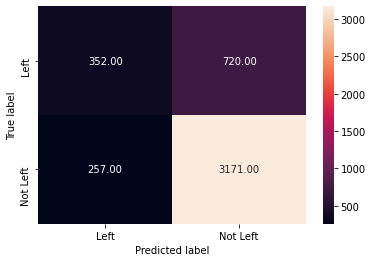

In [33]:
draw_cm(y_pred_df.actual,
y_pred_df.predicted)

In [34]:
print(metrics.classification_report(y_pred_df.actual,
y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3428
           1       0.58      0.33      0.42      1072

    accuracy                           0.78      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



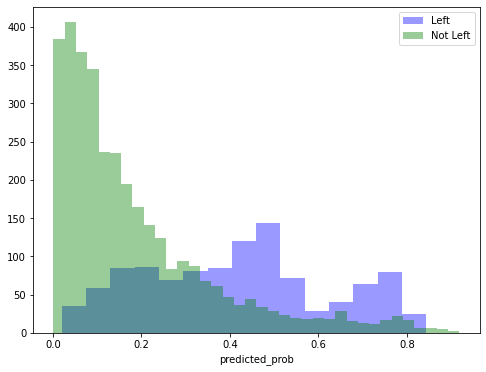

In [36]:
plt.figure(figsize = (8,6))
sns.distplot(y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'Left' )
sns.distplot(y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Not Left' )
plt.legend()
plt.show()

In [37]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

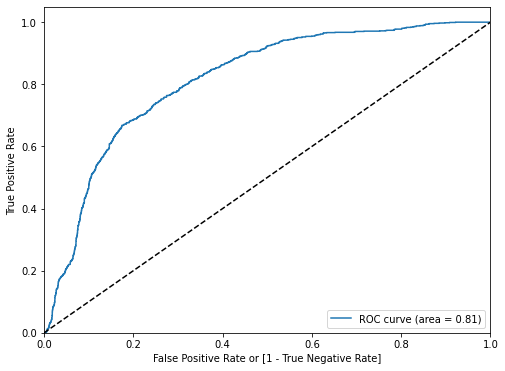

In [38]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual,
y_pred_df.predicted_prob)

In [39]:
auc_score = metrics.roc_auc_score(y_pred_df.actual,
y_pred_df.predicted_prob)
round(float(auc_score), 2)

0.81

In [40]:
tpr_fpr = pd.DataFrame({'tpr': tpr,
                        'fpr': fpr,
                        'thresholds': thresholds})
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending = False)[0:5]

,tpr,fpr,thresholds,diff
1155,0.667910,0.174446,0.320829,0.493465
1156,0.667910,0.174737,0.320782,0.493173
1157,0.667910,0.175029,0.320512,0.492881
1158,0.667910,0.175321,0.319931,0.492590
1172,0.671642,0.179405,0.317379,0.492237


In [41]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
                                lambda x: 1 if x > 0.22 else 0)

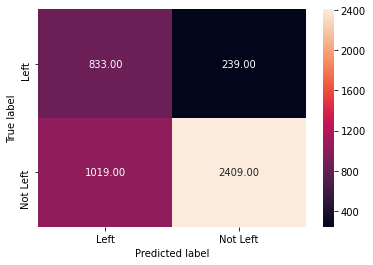

In [42]:
draw_cm(y_pred_df.actual,
        y_pred_df.predicted_new)

In [43]:
print(metrics.classification_report(y_pred_df.actual,
y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      3428
           1       0.45      0.78      0.57      1072

    accuracy                           0.72      4500
   macro avg       0.68      0.74      0.68      4500
weighted avg       0.80      0.72      0.74      4500

